GPU and TPU active

In [2]:
import torch
# confirm if GPU is active
torch.cuda.is_available()

False

In [4]:
import os
# confirm if TPU is active
# assert os.environ['COLAB_PU_ADDR']

Linear regression with sklearn

In [5]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
X.shape, y.shape

((506, 13), (506,))

In [6]:
# random 70-30 train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# we'll perform an OLS linear regression on the training set
reg = LinearRegression().fit(X_train, y_train)
print("R2 (train) =", reg.score(X_train, y_train))
print("MSE (train) =", mean_squared_error(y_train, reg.predict(X_train)))
print("MSE (train) =", mean_squared_error(y_test, reg.predict(X_test)))

R2 (train) = 0.7103879080674731
MSE (train) = 23.513334449327022
MSE (train) = 19.831323672063178


Some utilities

In [10]:
# For loop progress bar
from tqdm import *
from time import *

for j in range(2):
  progress = tqdm(range(10), desc=f"Epoch {j}")
  for i in progress:
    sleep(.1)
    progress.set_postfix(loss=i)

Epoch 1: 100%|██████████| 10/10 [00:01<00:00,  9.80it/s, loss=9]


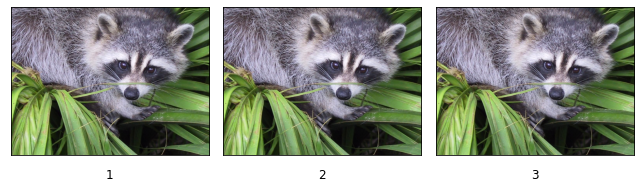

In [13]:
# Displaying images
import sklearn.datasets
import scipy.misc
import matplotlib.pyplot as plt
def plot_gallery(images, titles=None, xscale=1, yscale=1, nrow=3, ncol=6, 
                 output=None):
  plt.figure(figsize=(xscale * ncol, yscale * nrow))

  for i in range(nrow * ncol):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(images[i])
    if titles is not None:
      # use size and y to adjust font size and position of title
      plt.title(titles[i], size=12, y=-0.2)
    plt.xticks(())
    plt.yticks(())

  plt.tight_layout()
  if output is not None:
    plt.savefig(output)
  plt.show()

racoon = scipy.misc.face()
plot_gallery([racoon, racoon, racoon], titles=['1', '2', '3'], xscale=3, 
             yscale=3, nrow=1, ncol=3)